In [1]:
#Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 1. Dataset Information

The CORD-19 dataset is a comprehensive and openly accessible resource that systematically compiles scientific publications related to the COVID-19 pandemic for use by researchers. Published by the Allen Institute for AI, this dataset contains over one million records. The accompanying metadata.csv file includes key metadata for each academic article, such as the title, abstract, author information, and publication date. In this study, the dataset was loaded, its structure examined, and it was prepared for conducting fundamental analyses.

- cord_uid: Her CORD-19 makalesine atanan benzersiz tanımlayıcı (aynı makale birden çok kaynakta yer alabilir)  
- sha: Makaleye ait PDF dosyalarının SHA‑1 hash değerleri, birden çok dosya varsa noktalı virgülle ayrılmış 
- source_x: Makalenin elde edildiği kaynaklar (örneğin ArXiv, Elsevier, PMC, WHO gibi), noktalı virgülle ayrılmış 
- title: Makalenin başlığı 
- doi: Makalenin Dijital Nesne Tanımlayıcısı (DOI) 
- pmcid: Makalenin PubMed Central’daki (PMC) kimlik numarası (PMC ile başlar) 
- pubmed_id: Makalenin PubMed sistemindeki kimlik numarası (int türünde) 
- license: Makalenin sahip olduğu en izin verici lisans türü (örneğin cc‑by, gold‑oa vb.) 
- abstract: Makalenin özet metni 
- publish_time: Makalenin yayınlandığı tarih (YYYY‑MM‑DD formatında) 
- authors: Makaleyi yazan yazarların listesi (Soyadı, İsim formatında ve noktalı virgülle ayrılmış) 
- journal: Makalenin yayımlandığı dergi (normalizasyon yapılmamış metin olarak yer alır) 
- mag_id: (Artık kullanımda olmayan) Microsoft Academic Graph içindeki makalenin kimlik numarası 
- who_covidence_id: Dünya Sağlık Örgütü (WHO) tarafından verilen özel makale kimliği (örneğin “#72306”) 
- arxiv_id: Makalenin arXiv’daki tanımlayıcı numarası 
- pdf_json_files: PDF dosyalarının JSON’a dönüştürülmüş halleriyle ilgili dosya yolları (noktalı virgülle ayrılmış) 
- pmc_json_files: PMC’den alınan XML'lerin JSON parse edilmiş halleriyle ilgili dosya yolları (noktalı virgülle ayrılmış) 
- url: Makaleye ait tüm URL’lerin listesi (noktalı virgülle ayrılmış) 
- s2_id: COVID-19 makalesine ait Semantic Scholar (S2) kimliği, API’yle erişim için kullanılabilir 





Explotary Data Analysis

In [ ]:
# Load the dataset
df = pd.read_csv("dataset/metadata.csv")
# Display the first few rows of the dataset
df.head() 


C:\Users\nilay\AppData\Local\Temp\ipykernel_30448\3213893633.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\\Users\\nilay\\Documents\\GitHub\\COVID-19-Open-Research-Dataset-Challenge\\dataset\\metadata.csv")


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [40]:
# Check the last few rows of the dataset
df.tail()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
1056655,aeuy92bx,d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...,BioRxiv; MedRxiv; WHO,Potent neutralization of 2019 novel coronaviru...,10.1101/2020.02.01.929976,NaN,NaN,medrxiv,"2019-nCoV, which is a novel coronavirus emerge...",2020-02-02,"Lei, Changhai; Fu, Wenyan; Qian, Kewen; Li, Ti...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/d86cfba423427426c10fa...,NaN,https://doi.org/10.1101/2020.02.01.929976,211121242.0
1056656,n8hlrknq,b98985f125c3391aac709332e6380fe8b11ef6e5,Elsevier; Medline; PMC,"Molecular-based diagnostics, including future ...",10.1016/j.mpmed.2013.08.012,PMC7108438,32288574.0,no-cc,Microbiology laboratories have traditionally r...,2013-10-28,"Goldenberg, Simon",Medicine (Abingdon),NaN,NaN,NaN,document_parses/pdf_json/b98985f125c3391aac709...,document_parses/pmc_json/PMC7108438.xml.json,https://api.elsevier.com/content/article/pii/S...,214756712.0
1056657,05dxn54t,0d1698212a1fcbbed2ffff38953397b3fb82f30d,Medline; PMC,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,PMC7446980,32794685.0,no-cc,To present a patient with bilateral conjunctiv...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,NaN,NaN,NaN,document_parses/pdf_json/0d1698212a1fcbbed2fff...,document_parses/pmc_json/PMC7446980.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32794685/;...,221122247.0
1056658,zpeij14g,9b2bbb5ceb21084931b5de7e0d60633e524a20bb,Medline; PMC,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,PMC7370867,32691131.0,no-cc,Given COVID-19 pandemic periodic outpatient as...,2020-07-20,"Torretta, Sara; Capaccio, Pasquale; Coro, Ilar...",Eur J Pediatr,NaN,NaN,NaN,document_parses/pdf_json/9b2bbb5ceb21084931b5d...,document_parses/pmc_json/PMC7370867.xml.json,https://doi.org/10.1007/s00431-020-03747-9; ht...,220647629.0
1056659,pq54lvya,c7ae1a19b70e6e2806b670e4c0f64d3043698ee1,Medline; PMC,Hospital variation in admissions to neonatal i...,10.1038/s41372-020-00775-z,PMC7427695,32801351.0,no-cc,OBJECTIVE: To examine interhospital variation ...,2020-08-14,"Haidari, Eman S.; Lee, Henry C.; Illuzzi, Jess...",J Perinatol,NaN,NaN,NaN,document_parses/pdf_json/c7ae1a19b70e6e2806b67...,document_parses/pmc_json/PMC7427695.xml.json,https://doi.org/10.1038/s41372-020-00775-z; ht...,221129148.0


In [41]:
print("Dataset Information:")
print(df.info())

# Display the columns of the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist()) 

# Conclusion:
# we have 17 columns of object data type 
# we have 2 column of float data type

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non

In [42]:
# Display the shape of the dataset
df.shape

"""
The dataset contains 19 columns and 1,056,660 rows. 
The columns include metadata such as title, abstract, authors, publication date, and other relevant information about the research articles related to COVID-19.
"""

'\nThe dataset contains 19 columns and 1,056,660 rows. \nThe columns include metadata such as title, abstract, authors, publication date, and other relevant information about the research articles related to COVID-19.\n'

In [47]:
# Display the data types of each column
df.dtypes

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [48]:
# Check summary statistics for all numeric and categorical columns of the DataFrame
print("Summary Statistics:")
summary_stats = df.describe(include='all').T

# Show as a table for better readability
display(summary_stats) 

"""
According to the summary statistics:
**top: The most frequent value in the column.
**Freq: The number of times the most frequent value appears in the column (only shown for numerical)
"""


Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cord_uid,1056660,970836,kgpo6psq,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sha,373766,373719,31bc0fb718edaab9e33f678909710f62c40abebc,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_x,1056660,49,WHO,450459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1056157,850366,Reply,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doi,656780,655525,10.1016/j.scitotenv.2020.139397,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pmcid,389571,389571,PMC35282,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pubmed_id,498932.0,498587.0,35087663.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
license,1056660,18,unk,601506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,821116,730712,[Figure: see text].,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,1054846,8056,2021,233709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'\nAccording to the summary statistics:\n**top: The most frequent value in the column.\n**Freq: The number of times the most frequent value appears in the column (only shown for numerical)\n'

In [49]:
# Display the number of unique values in each column
print("Her sütundaki  benzersiz değer var sayısı:")
print(df.nunique())

Her sütundaki  benzersiz değer var sayısı:
cord_uid            970836
sha                 373719
source_x                49
title               850366
doi                 655525
pmcid               389571
pubmed_id           498587
license                 18
abstract            730712
publish_time          8056
authors             796659
journal              54993
mag_id                   0
who_covidence_id    482935
arxiv_id             14249
pdf_json_files      373719
pmc_json_files      315742
url                 686934
s2_id               678262
dtype: int64


In [46]:
# Chek if there are any duplicated rows in the dataset
df.duplicated().any()

False

In [50]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df['year'].describe()

count    518871.000000
mean       2019.961944
std           3.537352
min        1856.000000
25%        2020.000000
50%        2021.000000
75%        2021.000000
max        2024.000000
Name: year, dtype: float64

In [51]:
df['abstract_length'] = df['abstract'].astype(str).apply(len)
df['abstract_length'].describe()

count    1.056660e+06
mean     1.136394e+03
std      8.561330e+02
min      1.000000e+00
25%      3.840000e+02
50%      1.231000e+03
75%      1.695000e+03
max      1.223920e+05
Name: abstract_length, dtype: float64

In [52]:
df['author_count'] = df['authors'].astype(str).apply(lambda x: len(x.split(';')) if x != 'nan' else 0)
df['author_count'].describe()

count    1.056660e+06
mean     5.589016e+00
std      1.249685e+01
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      3.572000e+03
Name: author_count, dtype: float64

# 2.Missing Value Analysis
When analyzing the missing values in the dataset, it was found that certain columns such as mag_id, arxiv_id, and pmc_json_files had more than 70% missing data. In addition, critical columns for analysis, including abstract, publish_time, and authors, also contained missing values. The publication year (year) field was missing in approximately half of the dataset; therefore, only records with valid year information were used in the time series analysis. The proportion and distribution of missing data were visualized and reported.

In [53]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum().sort_values()

# Calculate the percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Create a summary DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percent
})

# Display columns with more than 10% missing data
missing_data[missing_data['Missing (%)'] > 10]


,Missing Values,Missing (%)
abstract,235544,22.291371
url,369726,34.990063
doi,399880,37.843772
publish_time,537789,50.895179
year,537789,50.895179
pubmed_id,557728,52.782163
who_covidence_id,573725,54.296084
pmcid,667089,63.131849
pdf_json_files,682894,64.627600
sha,682894,64.627600


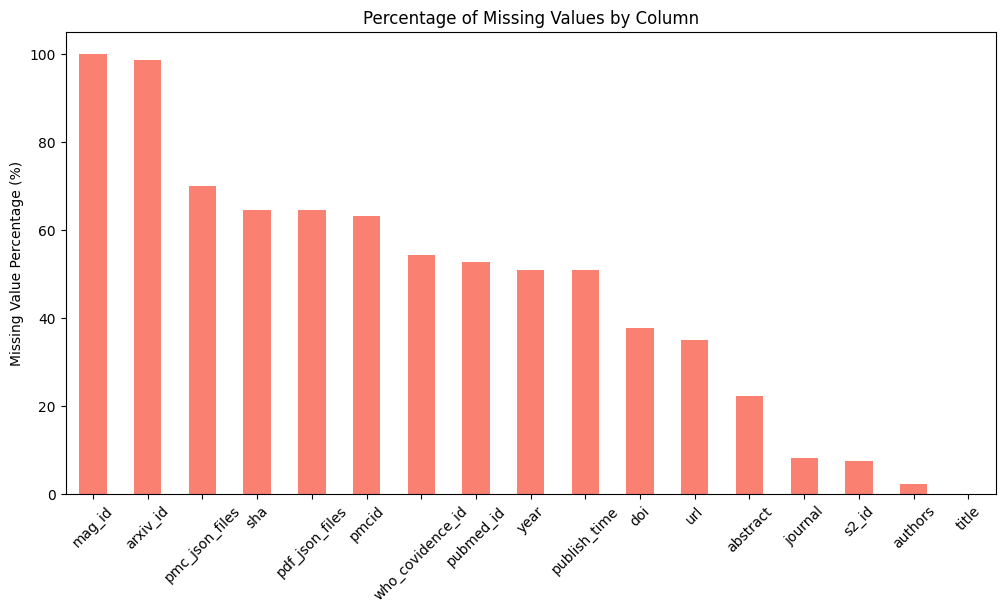

In [54]:
# Bar plot for missing values percentage
missing_percent = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(12, 6))
missing_percent[missing_percent > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.ylabel("Missing Value Percentage (%)")
plt.title("Percentage of Missing Values by Column")
plt.xticks(rotation=45)
plt.show()

# 3. Outlier Analysis
According to the results of the outlier analysis, no meaningful data were found in the mag_id column, and therefore no outliers were detected. In the s2_id column, a negative skewness was observed, with a total of 70,248 outliers identified. The year column exhibited strong negative skewness, resulting in 43,664 outliers. In the abstract_length column, a high positive skewness was observed, with 5,113 outliers detected. The most striking finding was in the author_count column, where extremely high positive skewness was calculated and a total of 61,183 outliers were identified. Overall, the dataset shows the highest concentration of outliers in the author count and article identifier columns, with a substantial number also found in publication year. Outliers in abstract length appeared at a relatively lower level. These findings indicate that particular caution is needed in time series analyses and text-based abstract evaluations.

In [55]:
numerical = df.select_dtypes(include=['float64', 'int64'])
for i in numerical.columns:
    print(f"Skewness of {i}: {df[i].skew()}")
    print(f"Standart deviation of {i}: {df[i].std()}")
    # Outlier detection using IQR method
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"Number of outliers in {i}: {len(outliers)}")
    print("------------------------------------")


Skewness of mag_id: nan
Standart deviation of mag_id: nan
Number of outliers in mag_id: 0
------------------------------------
Skewness of s2_id: -3.2616460252936217
Standart deviation of s2_id: 53122809.088056065
Number of outliers in s2_id: 70248
------------------------------------
Skewness of year: -6.698936666568979
Standart deviation of year: 3.5373523578429023
Number of outliers in year: 43664
------------------------------------
Skewness of abstract_length: 6.740314131105321
Standart deviation of abstract_length: 856.1329755671791
Number of outliers in abstract_length: 5113
------------------------------------
Skewness of author_count: 119.0330255345147
Standart deviation of author_count: 12.496849878269861
Number of outliers in author_count: 61183
------------------------------------


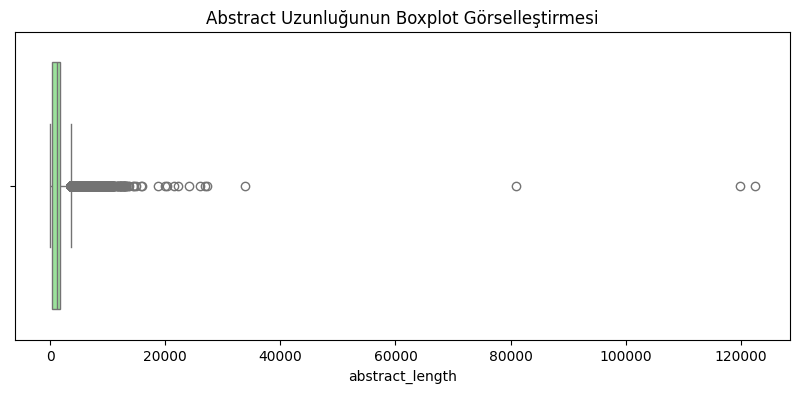

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['abstract_length'], color='lightgreen')
plt.title("Abstract Uzunluğunun Boxplot Görselleştirmesi")
plt.xlabel("abstract_length")
plt.show()

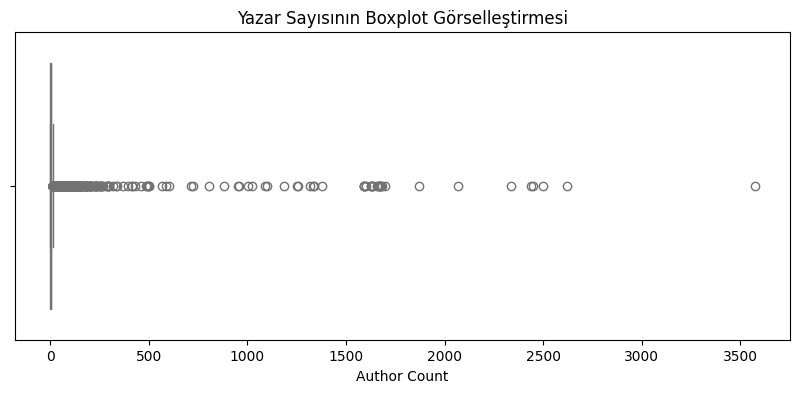

In [30]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['author_count'], color='lightgreen')
plt.title("Yazar Sayısının Boxplot Görselleştirmesi")
plt.xlabel("Author Count")
plt.show()

# 4. Korelasyon Matriksi (Correlation Matrix)

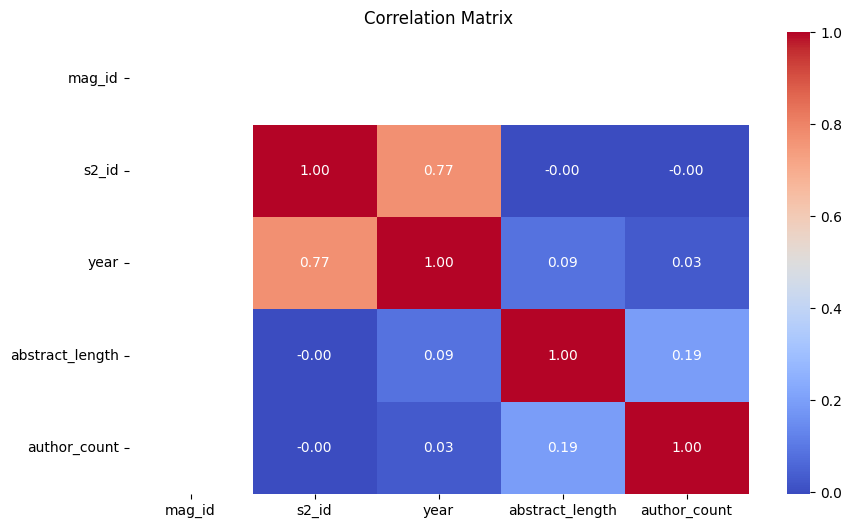

In [56]:
# Only numerical columns
numerical_cols = df.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 5. Görselleştirme Sonuçları ve Yorum
To gain a better understanding of the dataset’s structure, several visualizations were created. The distribution of articles by year was presented with a line chart, revealing a dramatic increase starting from 2020. This clearly demonstrates the direct impact of the COVID-19 pandemic on scientific publications. Overall, the visualizations have made it easier to comprehend both the structural and content-related dimensions of the dataset.

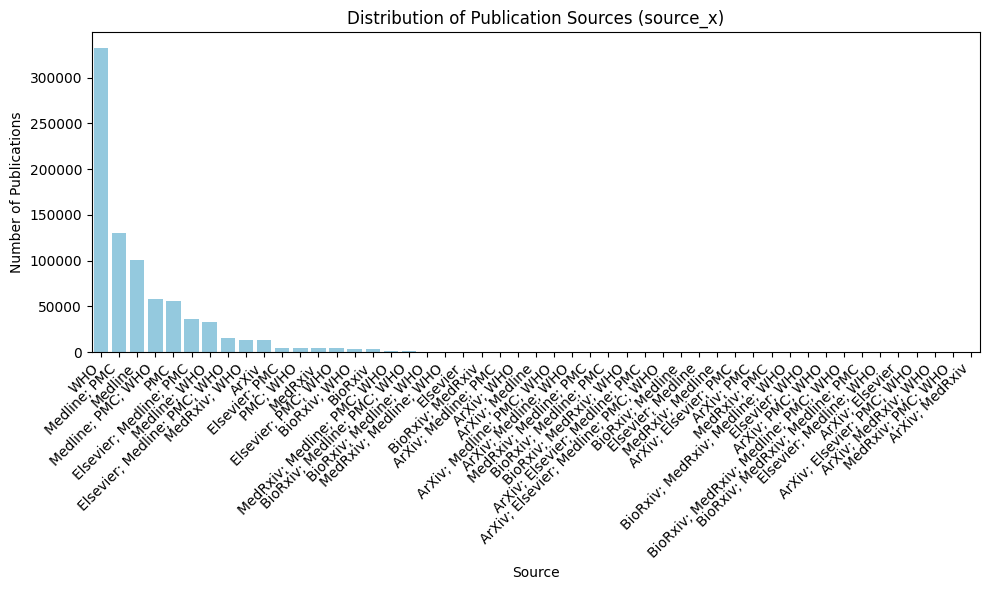

In [27]:
# Bar plot for distribution of publication sources
source_counts = df_clean['source_x'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.title("Distribution of Publication Sources (source_x)")
plt.xlabel("Source")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

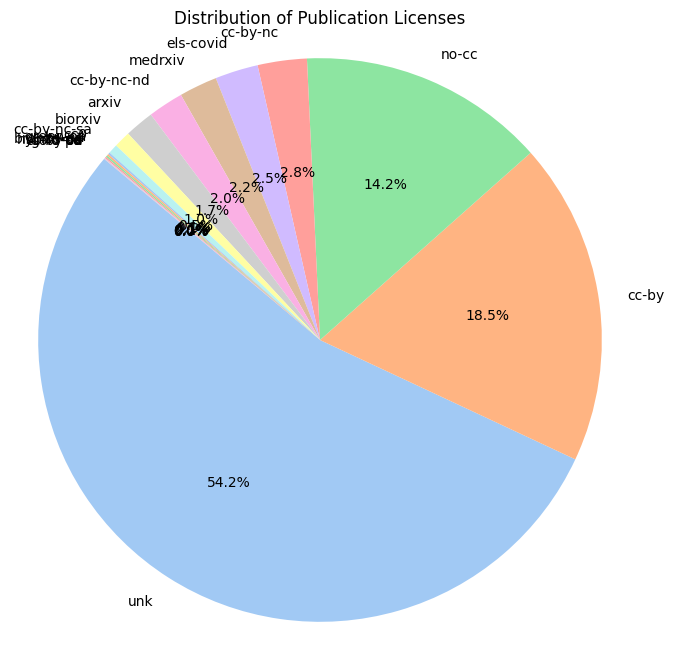

In [28]:
# Pie chart for distribution of publication licenses
license_counts = df_clean['license'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(license_counts, labels=license_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Publication Licenses")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\nilay\AppData\Local\Temp\ipykernel_23388\1753333444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette="Blues_d")


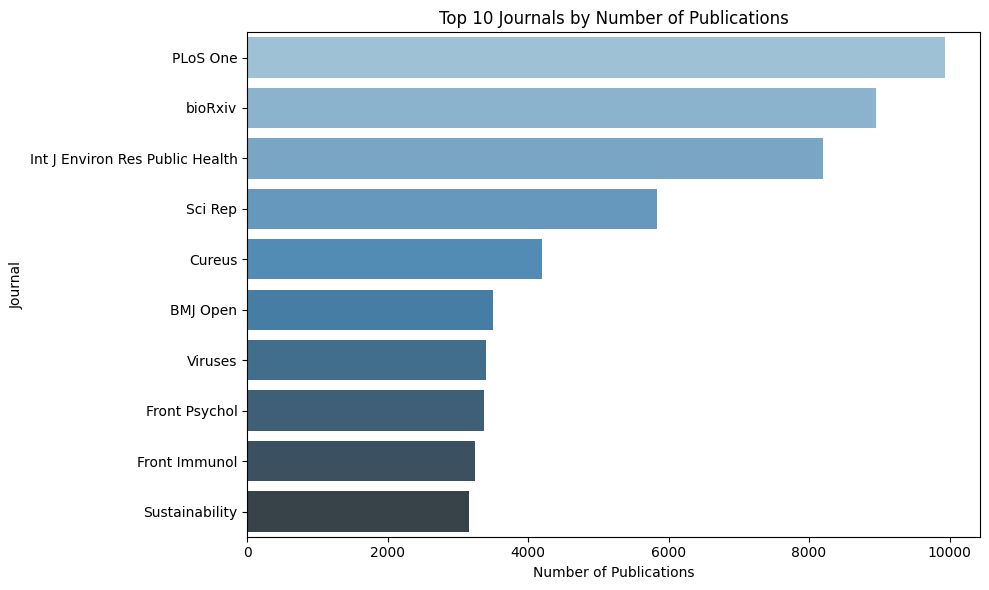

In [ ]:
top_journals = df_clean['journal'].value_counts().head(10)
#  Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="Blues_d")
plt.title("Top 10 Journals by Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()


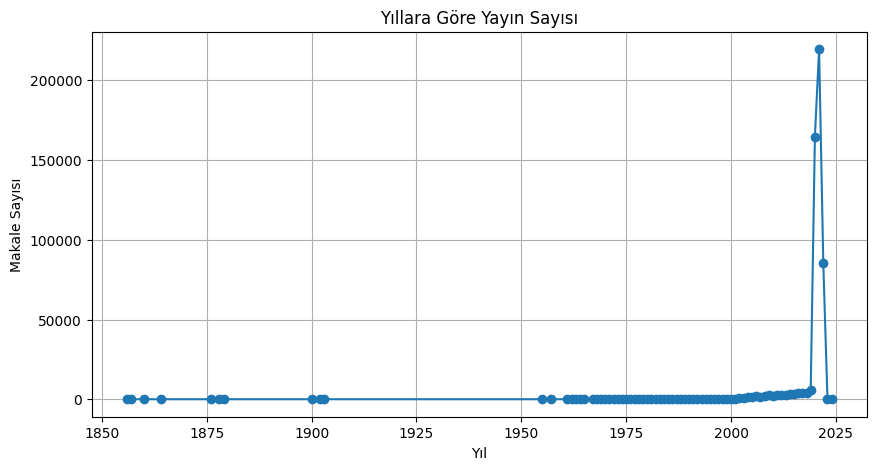

In [36]:
import matplotlib.pyplot as plt

# Geçerli yılı olan kayıtları filtrele
df_filtered = df[df['year'].notnull()]

# Yıllara göre grup ve say
yearly_counts = df_filtered['year'].value_counts().sort_index()

# Çizgi grafik
plt.figure(figsize=(10,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Yıllara Göre Yayın Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.grid(True)
plt.show()

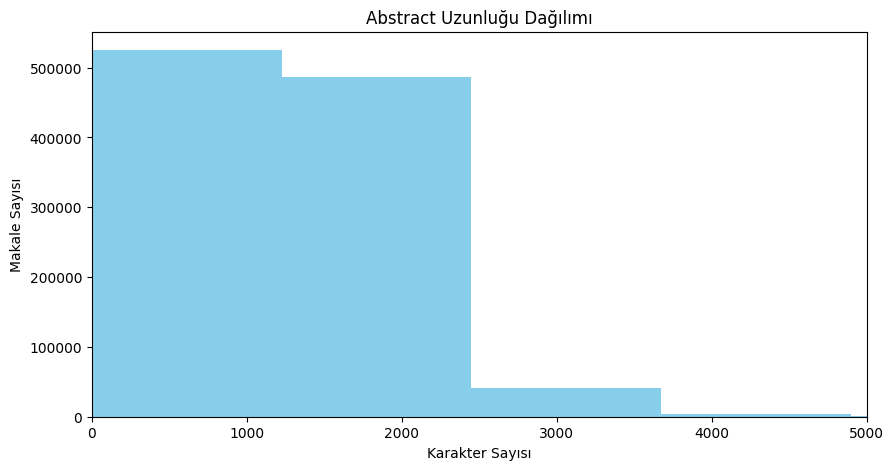

In [37]:
plt.figure(figsize=(10,5))
plt.hist(df['abstract_length'], bins=100, color='skyblue')
plt.title("Abstract Uzunluğu Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.ylabel("Makale Sayısı")
plt.xlim(0, 5000)  # çok uç değerleri dışlamak için
plt.show()

# 6. General Evaluation and Conclusion

This analysis has shown that the CORD-19 dataset is a highly valuable resource for understanding COVID-19-focused scientific production. Through statistical summaries, missing/outlier value analyses, and visualizations, the overall structure of the data, its potential risks, and its richness of information have been revealed. The surge in publications during the pandemic has been clearly demonstrated, highlighting the importance of data cleaning for conducting more reliable analyses. In future studies, advanced techniques such as text mining, topic modeling, and information extraction can be applied to this dataset.